#Učitavanje podataka 

Pre svega,neophodno je instalrati TensorFlow sledećom komandom

In [3]:
  !pip install tensorflow

     |████████████████████████████████| 462 kB 3.1 MB/s 


Sledi importovanje potrebnih biblioteka, među kojima su pandas, numpy, seborn itd.

In [114]:
import tensorflow as tf
from google.colab import files
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing


Sledeći deo koda vrši učitavanje csv fajla koji sadrži skup podataka za rad.

In [6]:
file=files.upload()

Saving winequalityN.csv to winequalityN.csv


In [115]:

dataset=pd.read_csv("winequalityN.csv")

Korisnik je sa front-a odabrao kolone koje će biti deo podataka za ulaz u neuronsku mrežu, kao i kolonu koja će biti izlaz iz mreže. Redni brojevi kolona se pamte u nizu. Takođe, omogućeno mu je da odabere iz koliko slojeva će se sastojati neuronska mreža, kao i koloko neurona će biti u svakom sloju. uMoguće je postaviti vrednost za epohu, learnig rate, regularizator, funkciju gubitka i aktivacionu funkciju, kao i odabrati način enkodiranja. Sve ove vrednosti će biti ulaz sa front-a, a za svaki od pomenutih atributa će biti definisan određeni "kod". Na primer, promenljiva koja predstavlja način enkodiranja će imati vrednost 1 ukoliko se radi o OneHot enkodiranju, 2 ukoliko je korisnik odabrao Label encoding

In [116]:
ulazi=[8,9,10]
enkodiranje=1 #1 OneHot #2 Label
aktivaciona=1 #1 relu, 2 sigmoid, 3 linear, 4 softmax
nedostajuceNum=4
nedostajuceKat=4
loss = 1 # 1 'binary_crossentropy', 2 mse, 3 'categorical_crossentropy'
brojNeurona=10
brojSlojeva = 2
learningRate=0.1
epoche=100
reg=1 #1- L1, 2 L2
regRate=0.1
izlaz=0
model=1 #1 klasifikacija 2 regresija

Napravićemo novi dataframe koji će sadržati samo kolone koje služe kao ulaz u neuronsku mrežu.

Funkcija **iloc()** služi za izdavanje određenih vrsta i kolona. U ovom slučaju argument koji kazuje koje vrste želimo ima vrednost **:**, što znači da uzimamo sve vrste navedenih kolona.

In [117]:
inputs=dataset.iloc[:,ulazi]
inputs.head()

,density,pH,sulphates
0,1.0010,3.00,0.45
1,0.9940,3.30,0.49
2,0.9951,3.26,0.44
3,0.9956,3.19,0.40
4,0.9956,3.19,0.40


Izdvajanje kolone koja predstavlja izlaz iz mreže

In [118]:
out=dataset.iloc[:,izlaz]
out.head()

0    white
1    white
2    white
3    white
4    white
Name: type, dtype: object

Objediniti kolone koje predstavljaju ulaz i izlaz iz mreže, tako što na niz koji predtavlja redne brojeve kolona koje su ulaz dodamo redni broj kolone koja je izlaz. Zatim pomoću funkcije **iloc()** izdvojimo odgovarajuće vrste i kolone.



In [119]:
ulazi.append(izlaz)
data = dataset.iloc[:,ulazi]
data.head()

,density,pH,sulphates,type
0,1.0010,3.00,0.45,white
1,0.9940,3.30,0.49,white
2,0.9951,3.26,0.44,white
3,0.9956,3.19,0.40,white
4,0.9956,3.19,0.40,white


# Analiza podataka

Pre svega, proverimo da li naš skup podataka ima nedostajuće vrednosti.

In [120]:
data.isna().sum()

density      0
pH           9
sulphates    4
type         0
dtype: int64

Pozivajući funkciju info() možemo saznati nešto više o našim podacima. Jedan bitan podatak je i tip svakog atributa koji je označen kolonom Dtype.

In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   density    6497 non-null   float64
 1   pH         6488 non-null   float64
 2   sulphates  6493 non-null   float64
 3   type       6497 non-null   object 
dtypes: float64(3), object(1)
memory usage: 203.2+ KB


Tipove podataka po kolonama možemo izdvojiti u niz sledećom komandom

In [122]:
tipovi = data.dtypes
print(tipovi)

density      float64
pH           float64
sulphates    float64
type          object
dtype: object


Analizirajmo malo naš skup podataka. Funkcija describe() daje neke informacije u kolonama, kao što su srednja vrednost, standardno odstupanje, minimum,maksimum itd.

In [123]:
data.describe()

,density,pH,sulphates
count,6497.000000,6488.000000,6493.000000
mean,0.994697,3.218395,0.531215
std,0.002999,0.160748,0.148814
min,0.987110,2.720000,0.220000
25%,0.992340,3.110000,0.430000
50%,0.994890,3.210000,0.510000
75%,0.996990,3.320000,0.600000
max,1.038980,4.010000,2.000000


Ukoliko pozovemo data.shape dobićemo iz koliko vrsta i kolona se sastoji naš 
skup podataka

In [124]:
shapes=data.shape
print(shapes)

(6497, 4)


# Enkodiranje i obrada nedostajućih vrednosti

## Definisanje potrebnih funkcija

Funkcija **LabelEncoding** kao argumente prima niz tipova podataka po kolonama i ceoskup podataka sa kojima radimo. Ona svaku kategorijsku promenljivu u skupo podataka enkodira pomocu LabelEncodera. 

Povratna vrednost je skup podataka sa enkodiranim kategorijskim kolonama.

In [125]:

def LabelEncoding(tipovi,data):
  i=0
  n=len(tipovi)
  for x in tipovi:
    if x == "object":
      label_encoder = preprocessing.LabelEncoder()
      naziv=data.iloc[:,i].name
      naziv1=naziv+"Label"
      data[naziv1]=label_encoder.fit_transform(data[naziv])
      del data[naziv]
    i+=1
  return data


Funkcija **OneHotEncoding** kao argumente prima niz tipova podataka po kolonama i ceoskup podataka sa kojima radimo. Ona svaku kategorijsku promenljivu u skupo podataka enkodira pomocu One hot enkodera.

Povratna vrednost je skup podataka sa enkodiranim kategorijskim kolonama.

In [126]:
def OneHotEncoding(tipovi,data):
  i=0
  n=len(tipovi)
  for x in tipovi:
    if x == "object":
      naziv=data.iloc[:,i].name
      data=pd.get_dummies(data, columns=[naziv],prefix=[naziv])
    i+=1
  return data

Funkcija **srediNumericke** kao argumente prima skup podataka, ceo broj (1,2,3...) koji predstavlja kod za određivanje načina sređivanja nedostajućih numeričkih vrednosti, kao i redni broj kolone koja se obrađuje. 

Ukoliko argument **kod** ima vrednost 1, nedostajuće vrednosti će se popuniti srednjom vrednošću kolone, 2 - popuniće se medijanom, 3-vršiće se brisanje nedostajučih vrednosti, vrednost 4 znači da je korisnik na front-u odabrao sređivanje nedostajućih vrednosti po default-u. U ovom slučaju je default-na vrednost brisanje, što je moguće promeniti.

Treba napomenuti da se ovde ne vrši klasično brisanje vrsta koje sadrže NaN vrednosti, nego se selektuju sve kolone koje ne sadrže NaN vrednosti. Funkcija dropna() bi obrisala iz celog dataset-a nedostajuće vrednosti i za kategorijske i za numeričke kolone, pa nije pogodna za korišćenje u ovom kontekstu.

Povratna vrednost je izmenjen skup podataka.

In [127]:

def srediNumericke(data,kod,i):
    naziv=data.iloc[:,i].name
    if kod == 1:
      vrednost=data[naziv].mean()
      data[naziv].fillna(vrednost, inplace=True)
    elif kod==2:
      vrednost=data[naziv].median()
      data[naziv].fillna(vrednost,inplace=True)
    elif kod == 3:
      data = data.loc[data[naziv].notnull()]
    elif kod == 4:
      data = data.loc[data[naziv].notnull()]
   
    return data

Funkcija **srediKategorijske** kao argumente prima skup podataka, ceo broj (1,2,3...) koji predstavlja kod za određivanje načina sređivanja nedostajućih kategorijskih vrednosti, kao i redni broj kolone koja se obrađuje. 

Ukoliko argument **kod** ima vrednost 1, nedostajuće vrednosti će se popuniti  najmanje ponovljenom vrednošću kolone, 2 - popuniće se najučestalijom, 3-vršiće se brisanje nedostajučih vrednosti, vrednost 4 znači da je korisnik na front-u odabrao sređivanje nedostajućih vrednosti po default-u. U ovom slučaju je default-na vrednost brisanje, što je moguće promeniti.


Treba napomenuti da se ovde ne vrši klasično brisanje vrsta koje sadrže NaN vrednosti, nego se selektuju sve kolone koje ne sadrže NaN vrednosti. Funkcija dropna() bi obrisala iz celog dataset-a nedostajuće vrednosti i za kategorijske i za numeričke kolone, pa nije pogodna za korišćenje u ovom kontekstu.

Povratna vrednost je izmenjen skup podataka.

In [128]:

def srediKategorijske(data,kod,i):
  naziv=data.iloc[:,i].name
  items = data[naziv].value_counts(sort=False)
  if kod==1:
    item = items.loc[[items.idxmin()]]
    value, count = item.index[0], item.iat[0]
    data[naziv].fillna(value, inplace=True)
  elif kod== 2:
    item = items.loc[[items.idxmax()]]
    value, count = item.index[0], item.iat[0]
    data[naziv].fillna(value, inplace=True)
  elif kod==3:
    data = data.loc[data[naziv].notnull()]
  elif kod==4:
    data = data.loc[data[naziv].notnull()]
  return data


Sledeća funkcija kao argumente prima dataset, kao i dve celobrojne vrednosti, čiji je značaj objasnjen u prethodnim funkcijama, pojedinačno. Vraća izmenjen skup podataka.

U zavisnosti od toga da li su kolone numeričkog ili kategorijskog tipa, poziva odgovarajuće funkcije za sređivanje nedostajućih vrednosti.



In [129]:
def srediNedostajuce(data,kod1,kod2):
  i=0
  tipovi = data.dtypes
  n=len(tipovi)
  for x in tipovi:
    if x == "object":
      data=srediKategorijske(data,kod1,i)
    else:
      data=srediNumericke(data,kod2,i)
      1
    i+=1
  return data

## Obrada nedostajućih vrednosti

Da bismo na pokaznom primeru proverili da li funkcije vrše predviđeni posao, kopirajmo u novu promenljivu ceo dataset.

Proverimo da li postoje nedostajuće vrednosti.

In [130]:
data1=data.copy()
data1.isna().sum()

density      0
pH           9
sulphates    4
type         0
dtype: int64

S obzirom da ne postoje nedostajuće vrednosti u koloni kategorijskog tipa, postavimo u nekoj random odabranoj vrsti, NaN vrednost za tu kolonu.

**Ovaj deo koda treba zanemariti pri univerzalnoj upotrebi projekta za bilo koji dataset. Ovde služi samo kao provera funkcionalnosti funkcije za brisanje nedostajućih vrednosti kategorijskog tipa**

In [145]:
data1.iloc[224,3]=np.NaN

Zaista, u vrsti sa rednim brojem 224 je nedostajuća vrednosti za kolonu **type**

In [146]:
data1.iloc[224,:]

density      0.9929
pH           3.3900
sulphates       NaN
typeLabel       NaN
Name: 224, dtype: float64

Recimo da želimo da na mestu nedostajućih vrednosti numeričkog tipa postavimo srednju vrednost kolone, a kod kategorijskih najmanje ponovljenu vrednost. Točemo uradili na sledeći način.

In [147]:
nedostajuceKat=1
nedostajuceNum=1
data1=srediNedostajuce(data1,nedostajuceKat,nedostajuceNum)

U promenljivoj **shapes** su sačuvane dimenzije početnog skupa podataka. Uradićemo upoređivanje sa dimenzijom posle izmene i vidimo da je broj vrsta i kolona isti. Dakle, nije izvršeno nikakvo brisanje.

In [148]:
print(shapes)

(6497, 4)


In [149]:
data1.shape

(6497, 4)

Pozivom sledećih funkcija vidimo da više ne postoje nedostajuće vrednosti u našem skupu podataka.

In [150]:
data1.isna().sum()

density      0
pH           0
sulphates    0
typeLabel    0
dtype: int64

Da bismo na pokaznom primeru proverili da li funkcije vrše predviđeni posao, kopirajmo u novu promenljivu ceo dataset.

Proverimo da li postoje nedostajuće vrednosti.

In [151]:
data2=data.copy()

In [152]:
data2.shape

(6497, 4)

In [153]:
data2.isna().sum()

density      0
pH           9
sulphates    4
type         0
dtype: int64

Sada želimo da obrišemo nedostajuće vrednosti iz skupa podataka.

In [154]:
nedostajuceKat=3
nedostajuceNum=3
data2=srediNedostajuce(data2,nedostajuceKat,nedostajuceNum)

In [ ]:
data2.isna().sum()

In [155]:
print(shapes)

(6497, 4)


In [156]:
data2.shape

(6484, 4)

Zaista, broj vrsta se smanjio, a u skupu data2 ne postoje nedostajuće vrednosti.

## Enkodiranje

Prvi skup podataka ćemo enkodirati pomoću LabelEncodinga, pozivom odgovarajuće definisane funkcije.

Ispisom prvih 5 vrsta pomoću funkcije head(), vidimo da naša funkcija ispravno funkcioniše.

In [157]:
data1=LabelEncoding(tipovi,data1)
data1.head()

,density,pH,sulphates,typeLabelLabel
0,1.0010,3.00,0.45,2
1,0.9940,3.30,0.49,2
2,0.9951,3.26,0.44,2
3,0.9956,3.19,0.40,2
4,0.9956,3.19,0.40,2


Drugi skup podataka ćemo enkodirati pomoću One hot encodinga, pozivom odgovarajuće definisane funkcije.

Ispisom prvih 5 vrsta pomoću funkcije head(), vidimo da naša funkcija ispravno funkcioniše.

In [158]:
data2=OneHotEncoding(tipovi,data2)
data2.head()

,density,pH,sulphates,type_red,type_white
0,1.0010,3.00,0.45,0,1
1,0.9940,3.30,0.49,0,1
2,0.9951,3.26,0.44,0,1
3,0.9956,3.19,0.40,0,1
4,0.9956,3.19,0.40,0,1


# Detektovanje outlier-a



## Isolation Forest

Isolation Forest, ili skraćeno iForest, je algoritam za otkrivanje anomalija zasnovan na stablu.

Zasnovan je na modelovanju normalnih podataka na takav način da se izoluju anomalije koje su i malobrojne.

Možda je najvažniji hiperparametar u modelu argument „kontaminacije“, koji se koristi za procenu broja odstupanja u skupu podataka. Ovo je vrednost između 0,0 i 0,5 i podrazumevano je podešena na 0,1.

In [159]:
from sklearn.ensemble import IsolationForest

#Pronalaženje outlier-a
iso = IsolationForest(contamination=0.1)
y = iso.fit_predict(data1)

#Uzmi sve redove koji nisu outlier-i
mask = y != -1
data1=data1.iloc[mask, :]

data1.shape

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


(5847, 4)

## SVM algoritam

Iako je SVM klasifikacioni algoritam, može se koristiti za otkrivanje odstupanja u ulaznim podacima i za skupove podataka za regresiju i za klasifikaciju.

Biblioteka scikit-learn obezbeđuje implementaciju SVM-a jedne klase u klasi OneClassSVM.

Klasa obezbeđuje argument „nu“ koji specificira približni odnos odstupanja u skupu podataka, koji je podrazumevano podešen na 0,1. U ovom slučaju ćemo ga postaviti na 0,01.

In [160]:
from sklearn.svm import OneClassSVM
svm = OneClassSVM(nu=0.01)
y = svm.fit_predict(data2)
mask = y != -1

data2=data2.iloc[mask, :]

data2.shape

(6417, 5)

# Podela na train i test skup

Ulazne kolone su sve osim poslednje, izlazna je poslednja

In [161]:
from sklearn.model_selection import train_test_split

X=data1.iloc[:,:-1]
y=data1.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, random_state=42
)

In [162]:
print(X_train.shape)

(4677, 3)


In [163]:
print(X_test.shape)

(1170, 3)


#Skaliranje podataka

 Neuronska mreža će misliti da je vrednost na višoj skali važnija, zato se vrši skaliranje podataka.

In [164]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Štampanjem kolone X_train_scaled vidimo da je skaliranje uspešno izvršeno.

In [165]:
print(X_train_scaled)

[[-1.14330109  0.68410652 -0.62739302]
 [ 1.8561908   0.33452224  2.00197334]
 [ 0.74923546 -1.13373172 -1.1532663 ]
 ...
 [ 0.75637711  0.19468853  2.79078325]
 [ 0.09934555  1.45319193  0.33670798]
 [ 1.32056725  0.26460539 -1.24091184]]


#Obuka klasifikacionog modela pomoću TensorFlow biblioteke

Ukoliko promenljiva model ima vrednost 1, vršiće se klasifikacija, a u suprotnom regresioni problem.

In [168]:
import tensorflow.keras.models
import tensorflow.keras.layers
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense

tf.random.set_seed(42)

if model == 1:
  num=len(y.unique())
  #print(num)
  if num == 2:
    los = 'binary_crossentropy'
  else:
    los='categorical_crossentropy'
else:
  los='mse'

if aktivaciona == 1:
  func = 'relu'
elif aktivaciona == 2:
  func='sigmoid'
elif aktivaciona==3:
  func='linear'
elif aktivaciona==4:
  func='softmax'

if reg==1:
  regul = regularizers.l2(regRate)
else:
  regul = regularizers.l1(regRate)


model = Sequential()

for i in range(brojSlojeva-1):
  model.add(Dense(brojNeurona, activation=func,kernel_regularizer=regul))

if model == 1 and num==2:
  model.add(Dense(1, activation='sigmoid',kernel_regularizer=regul))
elif model==1 and num>2:
  model.add(Dense(num, activation='softmax',kernel_regularizer=regul))
else:
  model.add(Dense(1, activation='linear',kernel_regularizer=regul))

opt = tf.keras.optimizers.Adam(learning_rate=learningRate)
model.compile(
    loss=los,
    optimizer=opt,
    metrics=['accuracy']
)

history = model.fit(X_train_scaled, y_train, epochs=epoche, validation_split=0.2)
model.evaluate(X_test,y_test,batch_size=32)


Epoch 1/100
117/117 [==============================] - 1s 3ms/step - loss: 0.5897 - accuracy: 0.0024 - val_loss: 0.5121 - val_accuracy: 0.0000e+00
Epoch 2/100
117/117 [==============================] - 0s 2ms/step - loss: 0.5246 - accuracy: 0.0110 - val_loss: 0.6263 - val_accuracy: 0.0588
Epoch 3/100
117/117 [==============================] - 0s 3ms/step - loss: 0.5089 - accuracy: 0.0182 - val_loss: 0.5021 - val_accuracy: 0.0000e+00
Epoch 4/100
117/117 [==============================] - 0s 2ms/step - loss: 0.5136 - accuracy: 0.0152 - val_loss: 0.4972 - val_accuracy: 0.0224
Epoch 5/100
117/117 [==============================] - 0s 2ms/step - loss: 0.5143 - accuracy: 0.0144 - val_loss: 0.5017 - val_accuracy: 0.0064
Epoch 6/100
117/117 [==============================] - 0s 2ms/step - loss: 0.5050 - accuracy: 0.0160 - val_loss: 0.5069 - val_accuracy: 0.0075
Epoch 7/100
117/117 [==============================] - 0s 3ms/step - loss: 0.5014 - accuracy: 0.0184 - val_loss: 0.5098 - val_accuracy

[2.859684944152832, 0.1905982941389084]

Pratili smo gubitke i tačnost tokom treninga i sačuvali ih u istoriji. Sada možemo da vizuelizujemo ove metrike da bismo stekli osećaj kako model radi.

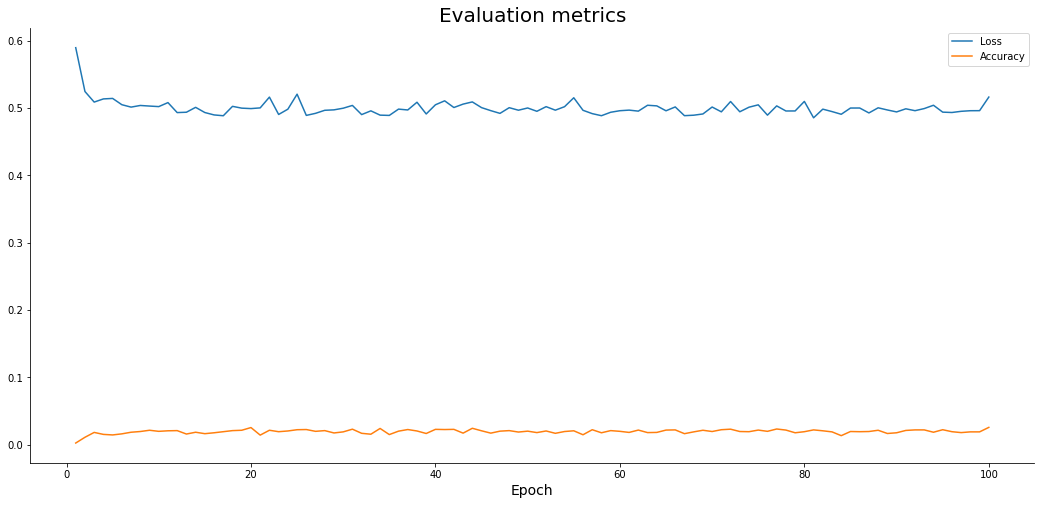

In [169]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

plt.plot(
    np.arange(1, 101), 
    history.history['loss'], label='Loss'
)
plt.plot(
    np.arange(1, 101), 
    history.history['accuracy'], label='Accuracy'
)
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

Praćenje funkcije loss u toku procesa treniranja.

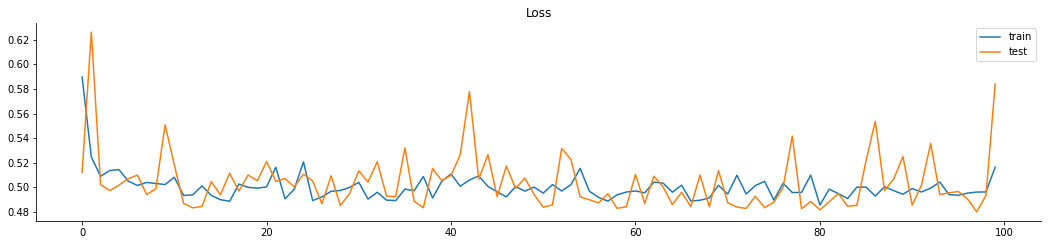

In [175]:
from matplotlib import pyplot
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

Praćenje vrednosti accuracy u toku procesa treniranja.

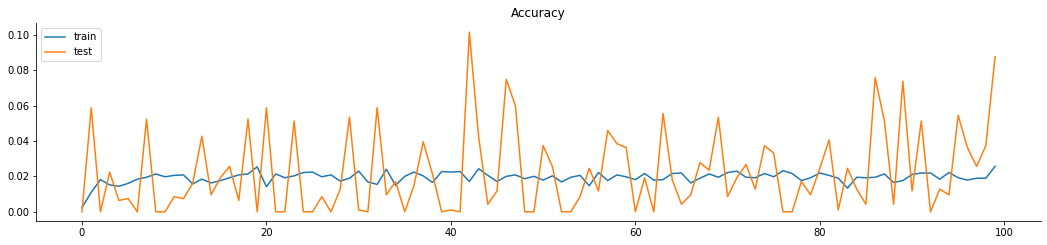

In [186]:
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

#Formiranje predikcije

In [185]:
predictions = model.predict(X_test_scaled)
print(predictions)

[[0.17729712]
 [1.6957326 ]
 [1.5321528 ]
 ...
 [1.195656  ]
 [0.7001121 ]
 [1.7787038 ]]
